# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
###Objective
## Recommad dealer whether to stock the car or not
## Suggest sell price

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel

from sklearn import set_config
set_config(display="diagram")

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/vehicles.csv')
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [4]:
#Review rows and count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
# Check missing value in percentage
(df.isna().mean() * 100).round(2)

id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00
dtype: float64

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

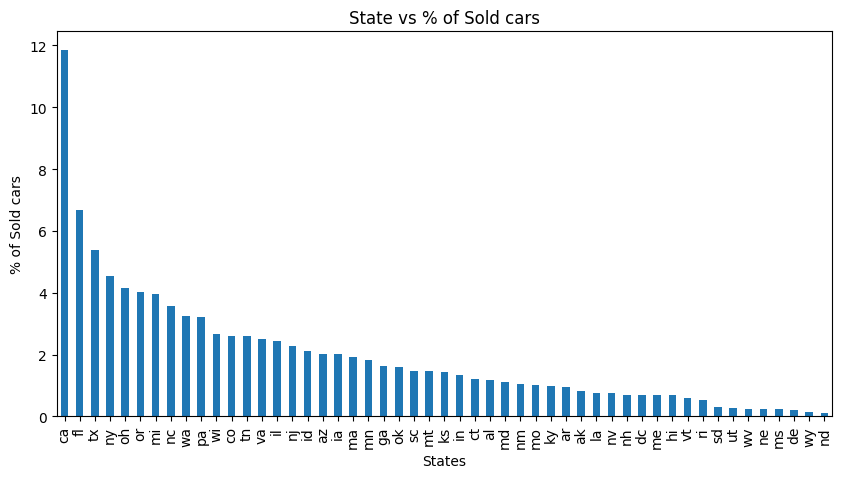

In [34]:
# state

# Missing values  : No
# distinct values : 51 States

# Data distribution
    # Top 5 States  : 32.61% [CA, FL, TX, NY, OH]
    # Top 10 States : 50.62%
    # Top 15 States : 63.43%
    # Top 20 States : 73.77%
    # Top 25 States : 81.76%

# Suggestion:
    # just keep 25 States and keep others as names as 'others'

#df['state'].value_counts(normalize=True).multiply(100).round(2)
df['state'].value_counts(normalize=True).multiply(100).round(2).head(5).sum()

ax = df['state'].value_counts(normalize=True).multiply(100).round(2).plot(kind='bar', title='State vs % of Sold cars',figsize=(10, 5))
ax.set_xlabel('States')
ax.set_ylabel('% of Sold cars')

plt.show()

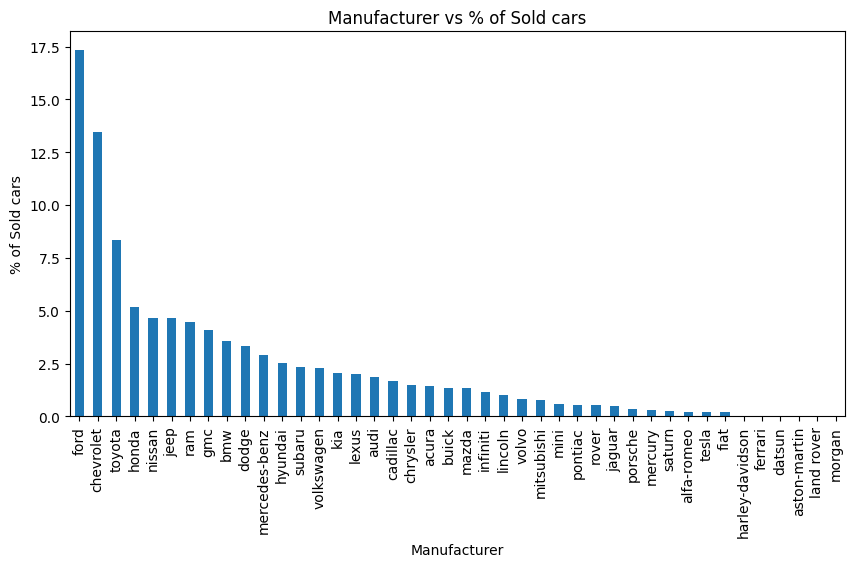

In [37]:
# manufacturer

# Missing values  : 4.13%
# distinct values : 42 manufacturer

# Data distribution
    # Top 5   : 49.03% [ford, chevrolet, toyota, honda, nissan]
    # Top 10  : 69.2%
    # Top 15  : 81.29%
    # Top 20  : 89.77%
    # Top 25  : 95.46%

# Suggestion:
    # just keep 25 brands and keep others as names as 'others'

df['manufacturer'].value_counts(normalize=True).multiply(100).round(2).head(25).sum()
df['manufacturer'].value_counts(normalize=True).multiply(100).round(2).count()

ax = df['manufacturer'].value_counts(normalize=True).multiply(100).round(2).plot(kind='bar', title='Manufacturer vs % of Sold cars',figsize=(10, 5))

ax.set_xlabel('Manufacturer')
ax.set_ylabel('% of Sold cars')
plt.show()

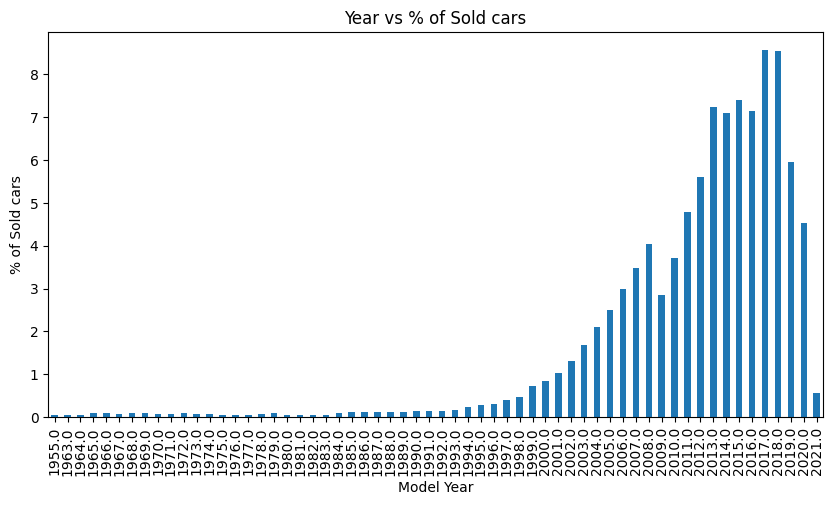

In [39]:
# year
# Missing values  : 0.28% missing
# distinct values : 1900 to 2022 (122 years)

# Data distribution
    # years 2022 to 2012(10 year span) : 66.88% covers
    # years 2022 to 2002(20 year span) : 92.62% covers
    # years 2022 to 1997(25 year span) : 95.63% covers
    # years 2022 to 1997(25 year span) : 95.63% covers
    # years 2022 to 1970(52 year span) : 99.03% covers

# Outliner:
    #(df['year'] < 1970)


#df['year'].describe(percentiles=[.09, .25, .50, .75, .90, .95, .999]).apply('{:,.2f}'.format)
#df['year'].value_counts(normalize=True).multiply(100).round(2).tail(20)
df['year'].value_counts(normalize=True).multiply(100).round(2).head(5).sum()
#df['year'].value_counts(normalize=True).multiply(100).round(2).head(54).sum()


ax = df['year'].value_counts(normalize=True).multiply(100).round(2).head(60).sort_index().plot(kind='bar',figsize=(10, 5), title='Year vs % of Sold cars')
ax.set_xlabel('Model Year')
ax.set_ylabel('% of Sold cars')
plt.show()


In [9]:
# odometer
# Missing values  : 1.03% missing
# min & max values : 0 to 10,000,000

# Data distribution
    # 90% data under 0 - 177k
    # 95% data under 0 - 204k
    # 99% data under 0 - 280k

# outlier:
    # By considering the year, car is at least 2 years old, so, odometer less than 1000 might be outlier
    #(df['odometer'] < 0) & (df['odometer'] > 300000)
    

df['odometer'].describe(percentiles=[.03, .25, .50, .75, .90, .95, .99]).apply('{:,.2f}'.format)

#odometer_buckets = np.array([10000, 30000, 60000, 90000, 120000, 150000, 180000, 210000, 300000, 400000, 10000000])
#ax = df['odometer'].apply(lambda x: reference_list[np.argmin(np.abs(odometer_buckets - x))]).value_counts(normalize=True).multiply(100).round(2).sort_index().plot(kind='bar')
#ax.set_ylabel('distribution percentage')


count       422,480.00
mean         98,043.33
std         213,881.50
min               0.00
3%            1,668.00
25%          37,704.00
50%          85,548.00
75%         133,542.50
90%         177,377.10
95%         204,000.00
99%         280,000.00
max      10,000,000.00
Name: odometer, dtype: object

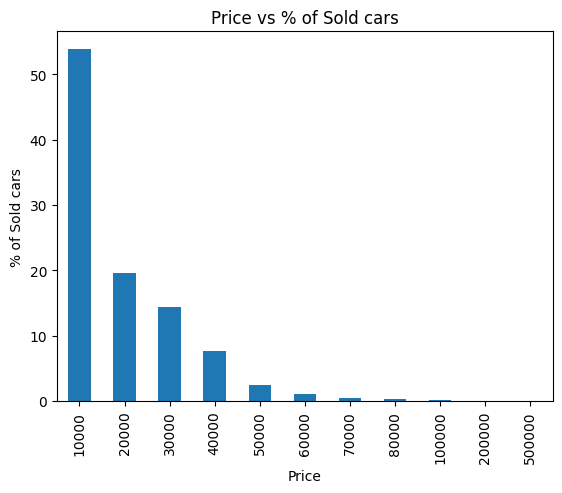

In [41]:
# price
# Missing values  : 0 % missing
# min & max values : 0 to 3,736,928,711

# Data distribution
    # 90% data under 0 - 37.5k
    # 95% data under 0 - 44.5k
    # 99% data under 0 - 67k
    # 99.99% data under 0 - 120k

#Outliner:
    # df[(df['price'] < 1( & (df['price'] > 120000)]

df['price'].describe(percentiles=[.10, .25, .50, .75, .90, .95, .99, .9999]).apply('{:,.2f}'.format)

price_buckets = np.array([10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 100000, 200000, 500000])
ax = df['price'].apply(lambda x: price_buckets[np.argmin(np.abs(price_buckets - x))]).value_counts(normalize=True).multiply(100).round(2).sort_index().plot(kind='bar', title='Price vs % of Sold cars')
ax.set_xlabel('Price')
ax.set_ylabel('% of Sold cars')
plt.show()


In [11]:
# model
# total distinct  : 29649
# Missing values  : 1.24

# Data distribution
    # Top 500 models  - 58.13 %
    # Top 1000 models - 69.30 %
    # Top 1500 models - 74.3 %
    # Top 2000 models - 79.30 %
    # Top 2500 models - 83.5 %

# consideration
    # Consider top 2500 models, others binds as 'Others' as the model

df['model'].value_counts(normalize=True).multiply(100).round(2).head(2000).sum()

np.float64(79.30000000000001)

In [12]:
# fuel
# gas 84.04
df['fuel'].value_counts(normalize=True).multiply(100).round(2)

# title_status
# clean 96.77
df['title_status'].value_counts(normalize=True).multiply(100).round(2)

# condition {good/execellent/like new 97%}  
df['condition'].value_counts(normalize=True).multiply(100).round(2)

# cylinders [4/6/8 covers 95%]
df['cylinders'].value_counts(normalize=True).multiply(100).round(2)

# transmission [automatic covers 80%]
df['transmission'].value_counts(normalize=True).multiply(100).round(2)

# drive [4wd/fwd/rwd]  
df['drive'].value_counts(normalize=True).multiply(100).round(2)

# size (full-size/mid-size/compact )
df['size'].value_counts(normalize=True).multiply(100).round(2)

# paint_color
#df['paint_color'].value_counts(normalize=True).multiply(100).round(2)


size
full-size      52.66
mid-size       28.61
compact        16.08
sub-compact     2.65
Name: proportion, dtype: float64

In [13]:
# type 
# Missing : 21.75%
df['type'].value_counts(normalize=True).multiply(100).round(2)

# Suggestion
    # this can be alternative to model, but data needs to be improved based on model on other observations
    


type
sedan          26.06
SUV            23.14
pickup         13.03
truck          10.56
other           6.62
coupe           5.75
hatchback       4.97
wagon           3.22
van             2.56
convertible     2.31
mini-van        1.44
offroad         0.18
bus             0.15
Name: proportion, dtype: float64

In [14]:
# Check duplicates
df.duplicated().sum()

np.int64(0)

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [15]:
# clean up na on year/manufacturer
    #year             0.28
    #manufacturer     4.13
    #model            1.24
    #fuel             0.71
    #odometer         1.03
    #title_status     1.93
    #transmission     0.60

df_clean = df.dropna(subset=['year', 'manufacturer', 'odometer', 'fuel', 'title_status', 'transmission'])

# Step 3: remove the unrequired columns for EDA
    # id & VIN - unquie id to identify the vehicle, won't help in EDA
    # size - missing 71% of data
    # cylinders - missing 41% of data 
    # drive - 30% missing data, valuable field(4wd, fwd, rwd), but might create bias
    # paint_color - 29% missing data, challenging to fill the data, might create bias
    # region - Not useful on EDA
df_clean = df_clean.drop(columns=['id', 'VIN', 'size', 'cylinders', 'drive', 'paint_color', 'region'])

#Step 4: impute valuable missing columns
# Condition is key data to determine the car price, though 40% data is missing, lets update the NAN with value as 'unknown'
df_clean['condition'].value_counts(normalize = True).multiply(100)
df_clean['condition'].fillna('unknown', inplace=True)

# type of the vehicle will determin the car price, might helpful to dertermine the fast selling or not, Since it missing 21% of data, , lets update the NAN with value as 'unknown'
df_clean['type'].value_counts(normalize = True).multiply(100)
df_clean['type'].fillna('unknown', inplace=True)


In [16]:
# remove outliers
# price
df_clean = df_clean[df_clean['price'] < 300000]
df_clean = df_clean[df_clean['price'] > 100]

# year
df_clean = df_clean[df_clean['year'] > 1970]

# odometer
df_clean = df_clean[df_clean['odometer'] > 1000]
df_clean = df_clean[df_clean['odometer'] < 300000]

# manufactors: only consider top 25 manufactors
top_25_manufactors = df_clean['manufacturer'].value_counts(normalize=True).multiply(100).round(2).head(25).index.tolist()
top_25_manufactors_condition = ~df_clean['manufacturer'].isin(top_25_manufactors)
df_clean.loc[top_25_manufactors_condition, 'manufacturer'] = 'others'

# models: only consider top 2500 models
top_25_models = df_clean['model'].value_counts(normalize=True).multiply(100).round(2).head(2500).index.tolist()
df_clean.loc[~df_clean['model'].isin(top_25_models), 'model'] = 'Others'


In [17]:
# adding new features
# age of the car is better readable column than year
df_clean['car_age'] = 2025 - df_clean['year']
df_clean.drop('year', axis=1, inplace=True)

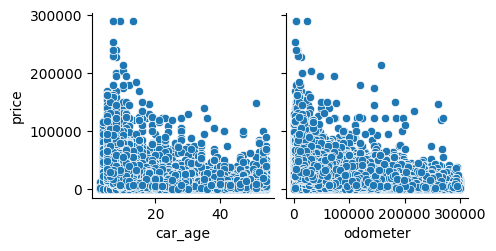

In [18]:
# check the correlation of basic key feature on price

x_features = ['car_age', 'odometer']
sns.pairplot(df_clean, x_vars=x_features, y_vars=['price']);

# Key observations
#  * car_age & odometer has negative correlations:
#  * car gets older, price will come down
#  * if car has used more, price will come down

In [19]:
df_clean[['car_age', 'odometer', 'price']].corr(method='kendall')

# car_age and odometer has high corelation. One might be enough for modelling

,car_age,odometer,price
car_age,1.000000,0.553626,-0.511403
odometer,0.553626,1.000000,-0.450202
price,-0.511403,-0.450202,1.000000


In [20]:
#Price distibution is Right skewed
price_skew = df_clean['price'].skew()
price_log_skew = np.log1p(df_clean['price']).skew()
price_Sqrt_skew = np.sqrt(df_clean['price']).skew()
price_skew, price_log_skew, price_Sqrt_skew

# Target variable skew getting better when do the transform to sqrt

(np.float64(1.558626623792018),
 np.float64(-1.1787403813222583),
 np.float64(0.28824467666851145))

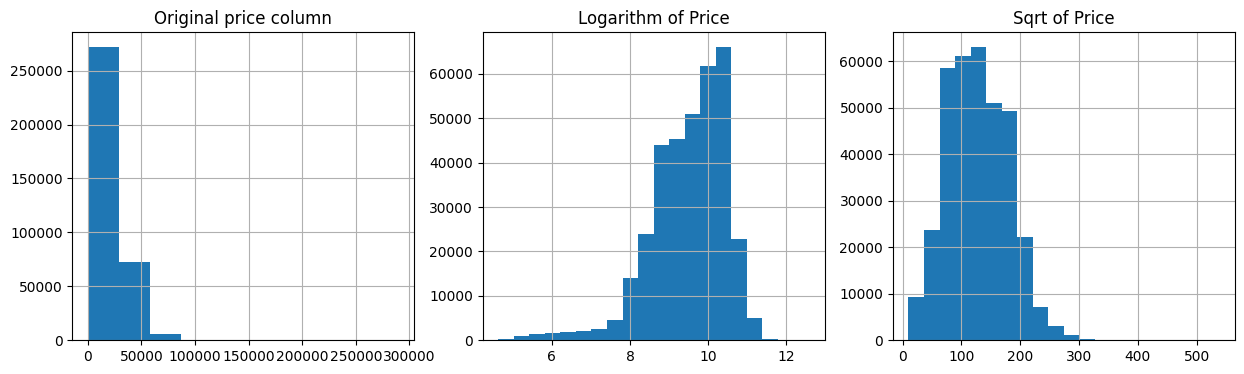

In [21]:

# price vs log of price
fig, ax = plt.subplots(1, 3, figsize = (15, 4))
ax[0].hist(df_clean['price'])
ax[0].grid()
ax[0].set_title('Original price column')
ax[1].hist(np.log1p(df_clean['price']), bins=20)
ax[1].grid()
ax[1].set_title('Logarithm of Price')
ax[2].hist(np.sqrt(df_clean['price']), bins=20)
ax[2].grid()
ax[2].set_title('Sqrt of Price');

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [22]:
df_samples = df_clean.sample(n=10000, random_state=42)

In [23]:
# Explore simple regression using age and odometer using diff approaches
    # Different transformation on the target variable to reduce skewness: log & sqrt
    # car_age and odometer has high corrleations, one might be enough for modelling

def execute_pipelie(df_samples, execution, func=None, inverse_func=None, features = ['car_age', 'odometer']):
    result = {}
    target_variable = 'price'

    X_sample = df_samples[features]
    y_sample = df_samples[target_variable]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    preprocessor = ColumnTransformer(
        transformers=[
                ('poly_features', PolynomialFeatures(degree=2), features)
            ],
        remainder='passthrough'
    )
    # Build the pipeline
    pipeline = Pipeline([
        #('preprocessor', preprocessor),
        ('regression', TransformedTargetRegressor(LinearRegression(), func=func, inverse_func=inverse_func))
    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    result['pipeline'] = pipeline
    result['mse']  = mean_squared_error(y_test, y_test_pred)
    result['mae']  = mean_absolute_error(y_test, y_test_pred)
    result['rmse'] = root_mean_squared_error(y_test, y_test_pred)

    prediction_result[execution] = result

def print_predictions(description, key):
    
    print(f"---------- {description} ----------")
    print(f"mean square error      : {prediction_result[key]['mse']}")
    print(f"mean absolute error    : {prediction_result[key]['mae']}")
    print(f"root mean square error : {prediction_result[key]['rmse']}")
    print("")
# -------------

independent_features = ['car_age', 'odometer']
target_variable = 'price'

prediction_result = {}

execute_pipelie(df_samples, 'linear_reg', features=['car_age', 'odometer'])
print_predictions('Linear Regression using age & usage(odometer)', 'linear_reg')

execute_pipelie(df_samples, 'linear_reg_with_log1p_transform', np.log1p, np.expm1, features=['car_age', 'odometer'])
print_predictions('Linear Regression using age & usage(odometer)  by adjusting applying log fn on Price', 'linear_reg_with_log1p_transform')

execute_pipelie(df_samples, 'linear_reg_with_sqrt_transform', np.sqrt, np.square, features=['car_age', 'odometer'])
print_predictions('Linear Regression using age & usage(odometer) by adjusting applying sqrt fn on Price', 'linear_reg_with_sqrt_transform')

execute_pipelie(df_samples, 'linear_reg_only_age', features=['car_age'])
print_predictions('Linear Regression using age', 'linear_reg_only_age')

execute_pipelie(df_samples, 'linear_reg_only_age_with_log1p_transform', np.log1p, np.expm1, features=['car_age'])
print_predictions('Linear Regression using age by adjusting applying log fn on Price', 'linear_reg_with_log1p_transform')

execute_pipelie(df_samples, 'linear_reg_only_age_with_sqrt_transform', np.sqrt, np.square, features=['car_age'])
print_predictions('Linear Regression using age by adjusting applying sqrt fn on Price', 'linear_reg_only_age_with_sqrt_transform')

execute_pipelie(df_samples, 'linear_reg_only_odometer', features=['odometer'])
print_predictions('Linear Regression using odometer', 'linear_reg_only_odometer')

execute_pipelie(df_samples, 'linear_reg_only_odometer_with_log1p_transform', np.log1p, np.expm1, features=['odometer'])
print_predictions('Linear Regression using odometer by adjusting applying log fn on Price', 'linear_reg_only_odometer_with_log1p_transform')

execute_pipelie(df_samples, 'linear_reg_only_odometer_with_sqrt_transform', np.sqrt, np.square, features=['odometer'])
print_predictions('Linear Regression using odometer by adjusting applying sqrt fn on Price', 'linear_reg_only_odometer_with_sqrt_transform')


print("************* Final Conclusion ************* ")
print("")
print("   * No significant improvements ingoring one of the highly corelated indepenendent features: car-age & odometer")
print("   * Best result : Linear Regression using age & usage(odometer) by adjusting applying sqrt fn on Price")
print("")
print_predictions('Linear Regression using age & usage(odometer) by adjusting applying sqrt fn on Price', 'linear_reg_with_sqrt_transform')
print("********************************************* ")


---------- Linear Regression using age & usage(odometer) ----------
mean square error      : 123826940.15483563
mean absolute error    : 8244.474800193027
root mean square error : 11127.755396073173

---------- Linear Regression using age & usage(odometer)  by adjusting applying log fn on Price ----------
mean square error      : 130837866.15110101
mean absolute error    : 7726.861185031537
root mean square error : 11438.43809928178

---------- Linear Regression using age & usage(odometer) by adjusting applying sqrt fn on Price ----------
mean square error      : 120629546.25388907
mean absolute error    : 7757.704054763939
root mean square error : 10983.148285163461

---------- Linear Regression using age ----------
mean square error      : 146116313.70464236
mean absolute error    : 9150.387707541946
root mean square error : 12087.858110709372

---------- Linear Regression using age by adjusting applying log fn on Price ----------
mean square error      : 130837866.15110101
mean abso

In [24]:
# Explore diffent Models
    # Ridge
    # Lasso

def execute_pipelie(df_samples, execution, regression, transform_features = []):
    result = {}
    target_variable = 'price'

    features = ['car_age', 'odometer']
    features = np.concatenate((features, transform_features))

    X_sample = df_samples[features]
    y_sample = df_samples[target_variable]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    # Create preprocessing pipeline
    #encode transform
    onehot_transformer = make_column_transformer(
        (OneHotEncoder(drop = 'if_binary', handle_unknown='ignore'), transform_features)
    )

    # Build the pipeline
    pipeline = Pipeline([
        ('transformer', onehot_transformer), 
        #('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),        
        ('scaler', StandardScaler(with_mean=False)),
        ('regression', TransformedTargetRegressor(regression, func=np.sqrt, inverse_func=np.square))

    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    result['pipeline'] = pipeline
    result['mse']  = mean_squared_error(y_test, y_test_pred)
    result['mae']  = mean_absolute_error(y_test, y_test_pred)
    result['rmse'] = root_mean_squared_error(y_test, y_test_pred)

    prediction_result[execution] = result

def print_predictions(description, key):
    
    print(f"---------- {description} ----------")
    print(f"mean square error      : {prediction_result[key]['mse']}")
    print(f"mean absolute error    : {prediction_result[key]['mae']}")
    print(f"root mean square error : {prediction_result[key]['rmse']}")
    print("")
# -------------

prediction_result = {}

model_name = '1'
model_desc = 'linear reg using all the independent variables except model'
transform_features = ['manufacturer','condition', 'fuel', 'transmission', 'type', 'state', 'title_status']
execute_pipelie(df_samples, model_name, regression=LinearRegression(), transform_features=transform_features)
print_predictions(model_desc, model_name)

model_name = '2'
model_desc = 'linear reg using all the independent variables'
transform_features = ['manufacturer', 'model', 'condition', 'fuel', 'transmission', 'type', 'state', 'title_status']
execute_pipelie(df_samples, model_name, regression=LinearRegression(), transform_features=transform_features)
print_predictions(model_desc, model_name)

model_name = '3'
model_desc = 'linear reg using only key independent variables'
transform_features = ['manufacturer', 'model']
execute_pipelie(df_samples, model_name, regression=LinearRegression(), transform_features=transform_features)
print_predictions(model_desc, model_name)

model_name = '2_ridge'
model_desc = 'Ridge reg using all the independent variables'
transform_features = ['manufacturer', 'model', 'condition', 'fuel', 'transmission', 'type', 'state', 'title_status']
execute_pipelie(df_samples, model_name, regression=Ridge(alpha=1), transform_features=transform_features)
print_predictions(model_desc, model_name)

model_name = '2_Lasso'
model_desc = 'Lasso reg using all the independent variables'
transform_features = ['manufacturer', 'model', 'condition', 'fuel', 'transmission', 'type', 'state', 'title_status']
execute_pipelie(df_samples, model_name, regression=Lasso(random_state = 42), transform_features=transform_features)
print_predictions(model_desc, model_name)


---------- linear reg using all the independent variables except model ----------
mean square error      : 117999930.20852302
mean absolute error    : 7816.8442685689415
root mean square error : 10862.777278786629

---------- linear reg using all the independent variables ----------
mean square error      : 104530938.62291412
mean absolute error    : 7034.506067102962
root mean square error : 10224.03729565352

---------- linear reg using only key independent variables ----------
mean square error      : 124424181.57525302
mean absolute error    : 7664.526119257476
root mean square error : 11154.55877994522

---------- Ridge reg using all the independent variables ----------
mean square error      : 104524472.29074189
mean absolute error    : 7034.247995359706
root mean square error : 10223.721058926729

---------- Lasso reg using all the independent variables ----------
mean square error      : 117304800.97328009
mean absolute error    : 7803.310910142559
root mean square error : 1083

In [25]:
# Finding best alpha for Ridge
def execute_pipelie(df_samples, execution, transform_features = []):
    result = {}
    target_variable = 'price'

    features = ['car_age', 'odometer']
    features = np.concatenate((features, transform_features))

    X_sample = df_samples[features]
    y_sample = df_samples[target_variable]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    # Create preprocessing pipeline
    #encode transform
    onehot_transformer = make_column_transformer(
        (OneHotEncoder(drop = 'if_binary', handle_unknown='ignore'), transform_features)
    )

    # Build the pipeline
    pipeline = Pipeline([
        ('transformer', onehot_transformer), 
        #('polyfeatures', PolynomialFeatures(degree = 2, include_bias = False)),        
        ('scaler', StandardScaler(with_mean=False)),
        ('regression', TransformedTargetRegressor( Ridge(), func=np.sqrt, inverse_func=np.square))

    ])

    params_dict = {'regression__regressor__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}
    grid = GridSearchCV(pipeline, param_grid=params_dict)

    # Fit the model
    grid.fit(X_train, y_train)

    # Predict and evaluate
    y_train_pred = grid.predict(X_train)
    y_test_pred = grid.predict(X_test)

    result['pipeline'] = pipeline
    result['mse']  = mean_squared_error(y_test, y_test_pred)
    result['mae']  = mean_absolute_error(y_test, y_test_pred)
    result['rmse'] = root_mean_squared_error(y_test, y_test_pred)

    prediction_result[execution] = result

    print(f'Best alpha: {list(grid.best_params_.values())[0]}')


def print_predictions(description, key):
    
    print(f"---------- {description} ----------")
    print(f"mean square error      : {prediction_result[key]['mse']}")
    print(f"mean absolute error    : {prediction_result[key]['mae']}")
    print(f"root mean square error : {prediction_result[key]['rmse']}")
    print("")
# -------------

prediction_result = {}

model_name = '2_ridge'
model_desc = 'Ridge reg using all the independent variables'
transform_features = ['manufacturer', 'model', 'condition', 'fuel', 'transmission', 'type', 'state', 'title_status']
execute_pipelie(df_samples, model_name, transform_features=transform_features)
print_predictions(model_desc, model_name)

Best alpha: 1000.0
---------- Ridge reg using all the independent variables ----------
mean square error      : 101299782.32013755
mean absolute error    : 6928.69952532289
root mean square error : 10064.779298133544



In [26]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold


# Selector model
def execute_pipelie(df_samples, execution, transform_features = []):
    result = {}
    target_variable = 'price'

    features = ['car_age', 'odometer']
    features = np.concatenate((features, transform_features))

    X_sample = df_samples[features]
    y_sample = df_samples[target_variable]

    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    # Create preprocessing pipeline

    numeric_features = ["car_age", "odometer"]
    numeric_transformer = Pipeline(
        steps=[            
            ('poly', PolynomialFeatures(degree=3)),
            ("scaler", StandardScaler())
        ]
    )
    
    #encode transform

    alphas = np.logspace(-4, 1, 100)
    cv_folds = 5
    lasso_cv = LassoCV(cv=KFold(n_splits=cv_folds), max_iter=10000, n_jobs=-1)

    categorical_transformer = Pipeline(
    steps=[
        ("encoder", (OneHotEncoder(drop = 'if_binary', handle_unknown='ignore'))),
        #("selector", SelectPercentile(chi2, percentile=50)),
    ]
    )
    preprocessor = ColumnTransformer(
        transformers=[
            ("numeric_transformer", numeric_transformer, numeric_features),
            ("categorical_transformer", categorical_transformer, transform_features),         
            # You can add other transformers for other columns here, e.g., scaling or one-hot encoding
        ],
        remainder='passthrough'  # Keep remaining columns as they are
    )

    # Build the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        #('selector', SelectFromModel(lasso_cv)),
        ('selector', SelectKBest(score_func=f_regression, k=50)),
        ('regression', TransformedTargetRegressor( Ridge(), func=np.sqrt, inverse_func=np.square))

    ])

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    result['pipeline'] = pipeline
    result['mse']  = mean_squared_error(y_test, y_test_pred)
    result['mae']  = mean_absolute_error(y_test, y_test_pred)
    result['rmse'] = root_mean_squared_error(y_test, y_test_pred)

    prediction_result[execution] = result

    feature_idx = pipeline.named_steps['selector'].get_support()    
    feature_list = pipeline.named_steps['preprocessor'].get_feature_names_out()    
    selected_feature_name = feature_list[feature_idx]

    #print(f'selected Features : {len(selected_feature_name)}')
    #print(f'selected Features : {selected_feature_name}')

    #print(f'Best alpha: {pipeline.named_steps('selector').estimator_.alpha_}')


def print_predictions(description, key):
    
    print(f"---------- {description} ----------")
    print(f"mean square error      : {prediction_result[key]['mse']}")
    print(f"mean absolute error    : {prediction_result[key]['mae']}")
    print(f"root mean square error : {prediction_result[key]['rmse']}")
    print("")
# -------------

prediction_result = {}

model_name = '2_ridge'
model_desc = 'Ridge reg using all the independent variables'
transform_features = ['manufacturer', 'model', 'condition', 'fuel', 'transmission', 'type', 'state', 'title_status']
execute_pipelie(df_samples, model_name, transform_features=transform_features)
print_predictions(model_desc, model_name)


---------- Ridge reg using all the independent variables ----------
mean square error      : 66625112.56555671
mean absolute error    : 5505.937759653419
root mean square error : 8162.420754013892



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Text(0.5, 1.0, 'Elbow curve')

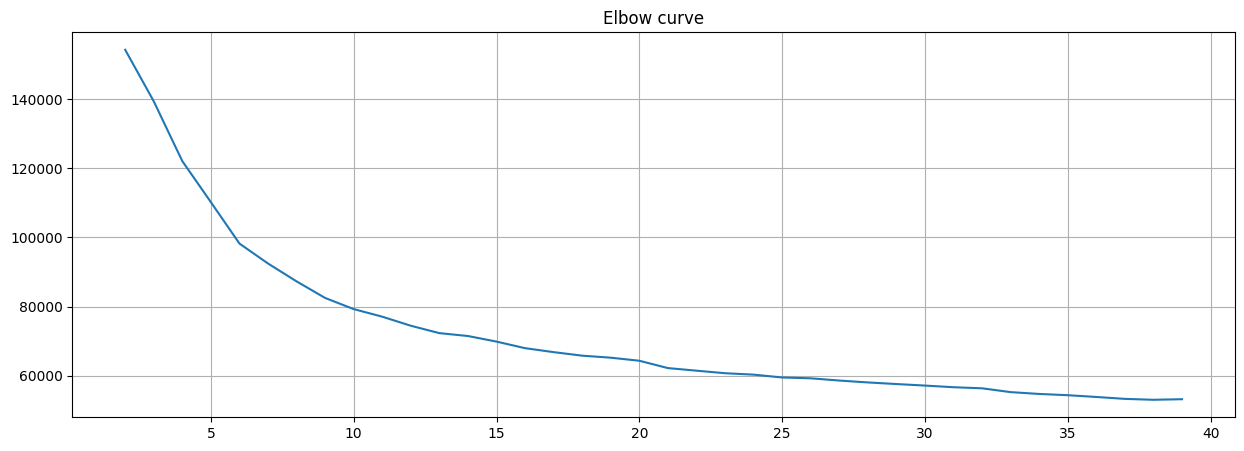

In [27]:
# Using cluster model to recommand dealer can stock the car or not
# finding the elbow of cluster

from sklearn.cluster import KMeans, DBSCAN, MiniBatchKMeans, BisectingKMeans

distorsions = []

def execute_pipelie(df_samples, cluster_size, transform_features = []):
    numeric_features = ['car_age', 'odometer', 'price']
    features = np.concatenate((numeric_features, transform_features))

    X_sample = df_samples[features]
    y_sample = df_samples[target_variable]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    # Create preprocessing pipeline

    numeric_transformer = Pipeline(
        steps=[            
            ('poly', PolynomialFeatures(degree=3)),
            ("scaler", StandardScaler())
        ]
    )

    categorical_transformer = Pipeline(
        steps=[
            ("encoder", (OneHotEncoder(drop = 'if_binary', handle_unknown='ignore'))),
    ]
    )
    
    preprocessor = ColumnTransformer(
        transformers=[
            ("numeric_transformer", numeric_transformer, numeric_features),
            ("categorical_transformer", categorical_transformer, transform_features),         
            # You can add other transformers for other columns here, e.g., scaling or one-hot encoding
        ],
        remainder='passthrough'  # Keep remaining columns as they are
    )

    # Build the pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('cluster', KMeans(n_clusters=cluster_size, random_state=0, n_init='auto'))
        #('cluster', MiniBatchKMeans(n_clusters=cluster_size, random_state=0, n_init='auto'))
        #('cluster', BisectingKMeans(n_clusters=cluster_size, random_state=0, n_init=3, bisecting_strategy="largest_cluster"))
        
        #('cluster', DBSCAN(eps=3, min_samples=200))

    ])

        # Fit the model
    pipeline.fit(X_train)

    # Predict and evaluate
    cluster_labels = pipeline.named_steps['cluster'].labels_
    distorsions.append(pipeline.named_steps['cluster'].inertia_)

    clusters = pd.DataFrame(cluster_labels).reset_index()
    clusters.rename(columns={0: 'cluster_label', 'index':'id'}, inplace=True)

    #print(clusters.groupby(by=["cluster_label"]).count())

    #print(clusters.head(10))


    # 6. Visualize the results
    #plt.figure(figsize=(12, 8))
    #plt.scatter(X_train['odometer'], X_train['price'], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
    #plt.title('K-Means Clustering with Scikit-learn Pipeline')
    #plt.xlabel('car_age')
    #plt.ylabel('Price')
    #plt.colorbar(label='Cluster Label')
    #plt.legend()
    #plt.show()

transform_features = ['manufacturer', 'model', 'condition', 'fuel', 'transmission', 'type', 'state', 'title_status']


#find number of cluster
for k in range(2, 40):
    execute_pipelie(df_samples, k, transform_features=transform_features)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 40), distorsions)
plt.grid(True)

plt.title('Elbow curve')    

# cluster size 10 is good size for number of clusters

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.


# Forcasting suggestions

### Car Age: 
Customers prefer newer vehicles. It’s recommended to stock inventory with cars from the last 10 years (model years 2011 to 2021).
### Mileage: 
Aim for vehicles with odometer readings under 120,000 miles to align with buyer preferences.
### Price Point: 
Cars priced below 40k tend to sell better, with particularly strong demand for those under 10k.
### Title Status: 
Vehicles with salvage titles have the lowest demand, while those with clean titles attract more buyers.
### Popular Manufacturers: 
Vehicles from Chevy, Ford, Toyota, Honda, and Nissan are especially in demand
### Fuel Type: 
Gasoline-powered cars remain significantly more popular than alternatives like electric, diesel, or hybrid vehicles.

# Create Model that will recommand the following for the dealership
### Recommandation: 
    * This gives the scale of 1-10, higher the number, recommanded to stock
    * This uses the Kmeans Clustering algoritm to creates 10 clusters, and sort based on the cluster size. Higher cluster size suggests more cars are sold in past, and will sold quicker in future

### Suggested Price: Based on the past sale, this will suggest the price for the car. 
    * This will suggest the price of the car
    * The suggestion is bit off by 5k to 8k dollars


In [28]:
# Final model 

features = ['car_age', 'odometer','manufacturer', 'model', 'condition', 'fuel', 'transmission', 'type', 'state', 'title_status']
transform_features = ['manufacturer', 'model', 'condition', 'fuel', 'transmission', 'type', 'state', 'title_status']
numeric_features = ['car_age', 'odometer']
target_variable = 'price'

recommondation_scale = np.arange(1, 11)
recommadation_matrix = pd.DataFrame()


#def stock_recommandation(year, make, model, odometer, title_status, state, condition):
def get_pre_processor():
    numeric_transformer = Pipeline(
        steps=[            
            ('poly', PolynomialFeatures(degree=3)),
            ("scaler", StandardScaler())
        ]
    )

    categorical_transformer = Pipeline(
        steps=[
            ("encoder", (OneHotEncoder(drop = 'if_binary', handle_unknown='ignore'))),
    ]
    )
    
    preprocessor = ColumnTransformer(
        transformers=[
            ("numeric_transformer", numeric_transformer, numeric_features),
            ("categorical_transformer", categorical_transformer, transform_features),         
            # You can add other transformers for other columns here, e.g., scaling or one-hot encoding
        ],
        remainder='passthrough'  # Keep remaining columns as they are
    )
    return preprocessor
    
def create_model(df_samples):
    X_sample = df_samples[features]
    y_sample = df_samples[target_variable]
    
    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

    # Create preprocessing pipeline    
    preprocessor = get_pre_processor()

    lasso_cv = LassoCV(cv=KFold(n_splits=5), max_iter=10000, n_jobs=-1)

    # Build the pipeline for price prediction
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        #('selector', SelectFromModel(lasso_cv)),
        ('selector', SelectKBest(score_func=f_regression, k=50)),
        ('regression', TransformedTargetRegressor( Ridge(), func=np.sqrt, inverse_func=np.square))
    ])
    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predict and evaluate
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    print(f"---------- Model price predict accurracy ----------")
    print(f"mean square error      : {mean_squared_error(y_test, y_test_pred)}")
    print(f"mean absolute error    : {mean_absolute_error(y_test, y_test_pred)}")
    print(f"root mean square error : {root_mean_squared_error(y_test, y_test_pred)}")
    print("")

    # Build the pipeline for recommandation
    pipeline1 = Pipeline([
        ('preprocessor', preprocessor),
        ('cluster', MiniBatchKMeans(n_clusters=10, random_state=0, n_init='auto'))
    ])

    pipeline1.fit(X_train)
    cluster_labels = pipeline1.named_steps['cluster'].labels_
    cluster_label_series = pd.Series(cluster_labels)
    #counts = series.value_counts()

    recommadation_matrix = pd.DataFrame(cluster_label_series.value_counts().sort_values(ascending=False)).reset_index().rename(columns={'count': 'cluster_size', 'index':'custer_id'})
    print(recommadation_matrix[recommadation_matrix['custer_id'] == 3].index)

    return pipeline, pipeline1, recommadation_matrix


price_prediction_model, recommandation_model, recommadation_matrix = create_model(df_samples) 

# Sample run
samples = df_clean.sample(n=10, random_state=42)
samples['forecosted_price'] = price_prediction_model.predict(samples).round(0)
samples['cluster'] = recommandation_model.predict(samples)
samples['recommandation'] = samples['cluster'].apply(lambda x: recommadation_matrix[recommadation_matrix['custer_id'] == x].index.values[0])
samples[['recommandation', 'forecosted_price', 'price', 'car_age', 'odometer','manufacturer', 'model', 'condition', 'fuel', 'transmission', 'type', 'state', 'title_status']]


---------- Model price predict accurracy ----------
mean square error      : 66625112.56555671
mean absolute error    : 5505.937759653419
root mean square error : 8162.420754013892

Index([9], dtype='int64')


,recommandation,forecosted_price,price,car_age,odometer,manufacturer,model,condition,fuel,transmission,type,state,title_status
310985,5,34407.0,40995,9.0,70698.0,ram,1500,excellent,diesel,automatic,unknown,or,clean
20642,0,26662.0,24768,6.0,47127.0,ford,flex,unknown,gas,automatic,unknown,ar,clean
115426,1,29519.0,32990,5.0,14766.0,cadillac,xt4 premium luxury,good,other,other,hatchback,fl,clean
263240,1,23972.0,18990,7.0,21036.0,kia,niro lx wagon 4d,good,other,other,wagon,nm,clean
175126,0,25521.0,38990,8.0,46924.0,ram,1500,unknown,other,automatic,unknown,la,clean
190179,4,8291.0,8000,14.0,95094.0,honda,accord,good,gas,automatic,sedan,ma,clean
197476,3,9916.0,11250,17.0,84000.0,subaru,impreza wrx,excellent,gas,manual,sedan,mi,clean
257893,7,3587.0,2600,23.0,249161.0,honda,accord,unknown,gas,manual,coupe,nj,clean
269909,6,4214.0,4950,19.0,190000.0,mercedes-benz,benz e350 4matic,excellent,gas,automatic,sedan,ny,clean
299406,5,32264.0,58988,6.0,101190.0,ford,f-250sd,excellent,gas,automatic,pickup,oh,clean
